- #### Planteamiento del problema:
¿Cúales son las características o aspectos que influyen en el precio de alquiler de los inmuebles?

Se importan los datos y se ven caracteristicas iniciales

In [3]:
import pandas as pd

datos = pd.read_csv("https://raw.githubusercontent.com/josedrosales/EDA/main/data/raw/AB_NYC_2019.csv")

print(datos.shape)
print()
print(datos.info())
print()
datos.head(2)

(48895, 16)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review        

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355


Inicialmente podemos notar que:

- Existen 48895 inmuebles considerados y 12 variables o clases para cada una de ellos, 

  entre estos el precio (clase a predecir), el resto son 11 clases predictoras.

- La presencia de 16 valores nulos para la clase "name" es irrelevante, pues no tiene relación 

  con el precio del inmueble. Caso similar para los 21 valores nulos de la clase "host_name".

- Para los casos de las clases last_review y reviews_per_month hay 10052 datos nulos.

- El resto de variables cuentan siempre con datos.

- El conjunto de datos contiene 7 variables categóricas (id, name, host_id, host_name, neighbourhood_group, neighbourhood, room_type).

- El conjunto de datos contiene 9 variables numéricas (latitude, longitude, price, minimum_nights, number_of_reviews, last_review, reviews_per_month, calculated_host_listings_count, availability_365).


- #### Se verifica si existen datos duplicados

In [5]:
duplicados = datos.duplicated().sum()

if duplicados:

    print(f'Existen {duplicados} datos duplicados.')

else:

    print(f'No existen datos duplicados.')
rango_latitud = datos.latitude.max() - datos.latitude.min()
rango_longitud = datos.longitude.max() - datos.longitude.min()

No existen datos duplicados.


In [6]:
print(f'Rango de la latitud es: {round(rango_latitud,4)}')
print(f'Rango de la longitud es: {round(rango_longitud,4)}')

Rango de la latitud es: 0.4133
Rango de la longitud es: 0.5314


- #### Eliminar informacion irrelevante
Clases:

- "id, name, host_id, host_name": son irrelevantes para la determinacion del precio de alquiler.
- Al estar dentro de un mismo estado los rangos de "latitud" y "longitud" son reducidos, lo cual limita su uso para análisis. Además resultan clases redundantes, ya que alternativamente se cuenta con las clases de "neighbourhood_group" y "neighbourhood".
- Las clases "last_review" y "reviews_per_month" son redundantes entre sí, nos quedaremos con "reviews_per_month".

In [7]:
datos.drop(['id','name','host_id','host_name','latitude','longitude','last_review'], axis=1, inplace=True)
datos.head(2)

,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Brooklyn,Kensington,Private room,149,1,9,0.21,6,365
1,Manhattan,Midtown,Entire home/apt,225,1,45,0.38,2,355


- #### Análisis de variables univariante

Para variables categoricas: neighbourhood_group, neighbourhood y room_type.

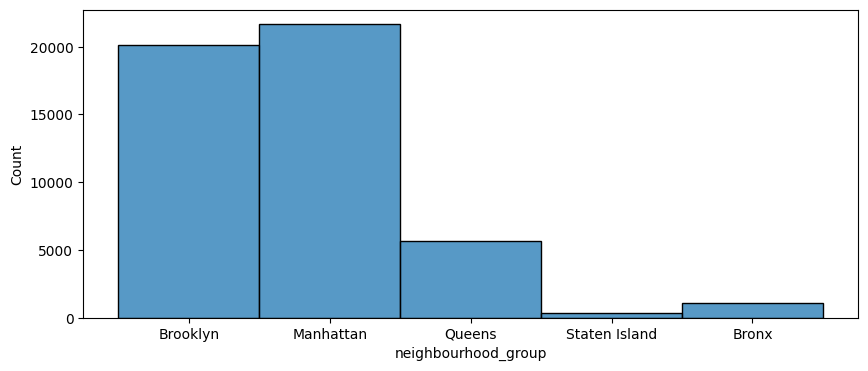

In [14]:
import matplotlib.pyplot as plt 
import seaborn as sns

plt.figure(figsize = (10, 4))
sns.histplot(data=datos, x="neighbourhood_group")
plt.show()